## **Imports**

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import (Dense, 
                                     BatchNormalization, 
                                     LeakyReLU, 
                                     Reshape, 
                                     Conv2DTranspose,
                                     Conv2D,
                                     Dropout,
                                     Flatten) 
import matplotlib.pyplot as plt

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Image Generation Helper

In [21]:
def generate_images(model, latent_vector_size, seed, num_images, lvm=None):
  # 1 - Generate images
  latent_vector_matrix = lvm
  if latent_vector_matrix is None:
    latent_vector_matrix = tf.random.normal([num_images, latent_vector_size], seed=seed)
  predictions = model(latent_vector_matrix, training=False)
  # 2 - Plot the generated images
  fig = plt.figure(figsize=(12,12))
  for i in range(num_images):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
  plt.show()

#### Model Name Mapping

In [51]:
# Contains saved model's name and latent vector size
model_mapping = {
    "Naive FC GAN - First attempt": {
        "saved_name": "naive_gan_firstattempt",
        "lv_size": 10
    },  
    "Big FC GAN - No momentum": {
        "saved_name": "big_vanillagan_beta0",
        "lv_size": 100
    },
    "9 Generator": {
        "saved_name": "9generator_b.5_a.7",
        "lv_size": 100
    },
    "DC Generator, Naive FC Discriminator": {
        "saved_name": "gcgangen_ganv1dis_50epoch",
        "lv_size": 10
    },
    "DCGAN Default Values | beta = .9 | batch = 256 | 50 epochs": {
        "saved_name": "beta0.9_batch256_50epoch",
        "lv_size": 100
    },
    "DCGAN Default | 2 epochs": {
        "saved_name": "test_default_dcgan_2epochs",
        "lv_size": 100
    },
    "DCGAN Default | 20 epochs": {
        "saved_name": "default_dcgan_20epochs",
        "lv_size": 100
    },
    "DCGAN | beta = 0": {
        "saved_name": "beta0_batch256_50epoch",
        "lv_size": 100
    },
    "DCGAN | beta = 0 | batch = 32": {
        "saved_name": "beta0_batch32_50epoch",
        "lv_size": 100
    },
}

## **Select Model 1**

In [54]:
#@title Select a Generator { form-width: "45%" }
base_path = '/content/drive/MyDrive/CS4701/source/saved_models/'
model1_name = 'DCGAN | beta = 0 | batch = 32' #@param ["Naive FC GAN - First attempt","Big FC GAN - No momentum","9 Generator","DC Generator, Naive FC Discriminator","DCGAN Default Values | beta = .9 | batch = 256 | 50 epochs","DCGAN Default | 2 epochs","DCGAN Default | 20 epochs","DCGAN | beta = 0","DCGAN | beta = 0 | batch = 32"]
latent_vector_size_1 = model_mapping[model1_name]['lv_size']
print(model_mapping[model1_name]['saved_name'])
generator1 = tf.keras.models.load_model(f'/content/drive/MyDrive/CS4701/source/saved_models/{model_mapping[model1_name]["saved_name"]}')

beta0_batch32_50epoch


#### Generate images from model 1

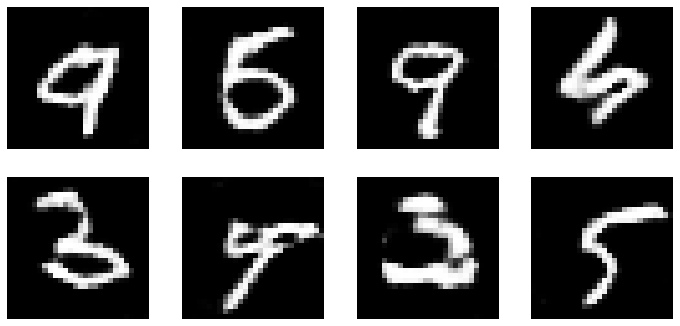

In [55]:
#@title  { form-width: "45%" }
# I'm trying to make the latent_vector deterministic, so if you
# type in the same seed, you'll get the same generated image.
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed

seed =  42# @param {type:"number"}
number_of_images =  8# @param {type:"number"}

generate_images(generator1, latent_vector_size_1, seed, number_of_images)

## **Select Model 2**

In [56]:
#@title Select a Generator { form-width: "45%" }
base_path = '/content/drive/MyDrive/CS4701/source/saved_models/'
model2_name = 'DCGAN | beta = 0' #@param ["Naive FC GAN - First attempt","Big FC GAN - No momentum","9 Generator","DC Generator, Naive FC Discriminator","DCGAN Default Values | beta = .9 | batch = 256 | 50 epochs","DCGAN Default | 2 epochs","DCGAN Default | 20 epochs","DCGAN | beta = 0","DCGAN | beta = 0 | batch = 32"]
latent_vector_size_2 = model_mapping[model2_name]['lv_size']
print(model_mapping[model2_name]['saved_name'])
generator2 = tf.keras.models.load_model(f'/content/drive/MyDrive/CS4701/source/saved_models/{model_mapping[model2_name]["saved_name"]}')

beta0_batch256_50epoch


#### Generate image from model 2

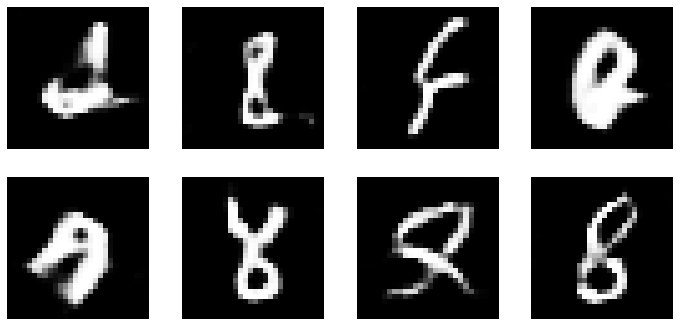

In [57]:
#@title  { form-width: "45%" }
seed =  90# @param {type:"number"}

# same size as first input layer of generator
number_of_images =  8# @param {type:"number"}
generate_images(generator2, latent_vector_size_2, seed, number_of_images)

## Model Comparison

DCGAN | beta = 0 | batch = 32


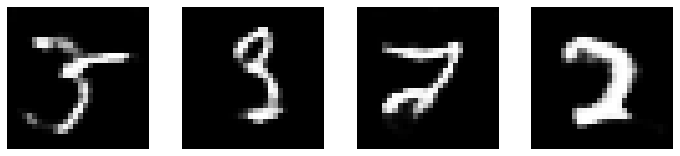

DCGAN | beta = 0


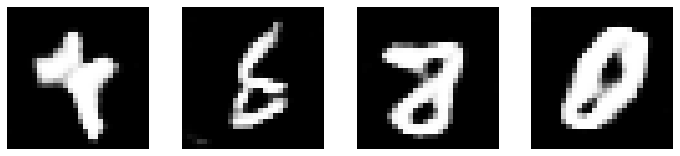

In [63]:
#@title  { form-width: "45%" }
seed =  87#@param {type:"integer"}
number_of_images =  4#@param {type:"integer"}

if latent_vector_size_1 == latent_vector_size_2:
  noise_matrix = tf.random.normal([number_of_images, latent_vector_size_1], seed=seed)
else:
  noise_matrix = None

print(model1_name)
generate_images(generator1, latent_vector_size_1, seed, number_of_images, lvm=noise_matrix)
print(model2_name)
generate_images(generator2, latent_vector_size_2, seed, number_of_images, lvm=noise_matrix)

#### Model Inspection


In [ ]:
generator1.summary

In [ ]:
generator2.summary